In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from data_load import Data_Reader

In [4]:
load_data = Data_Reader()

In [5]:
df = load_data.get_df()

In [6]:
df.head()

,ano,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
0,2001,135.9,68.7,138.8,3.6,9.8,0.4,0.0,0.2,71.0,69.8,56.6,217.4
1,2002,49.8,12.0,67.6,54.0,28.8,0.6,0.0,0.0,87.0,113.0,119.2,85.6
2,2003,51.0,79.4,63.0,79.2,8.0,0.0,0.0,0.6,1.0,165.4,104.8,71.2
3,2004,19.4,89.4,45.2,15.4,34.4,0.0,0.0,4.2,1.0,69.0,27.2,38.0
4,2005,4.2,27.2,16.8,7.0,15.0,0.0,7.0,0.0,0.0,106.0,143.0,72.0


## MODELS TRAINING

In [7]:
mydata = load_data.transform()

In [8]:
mydata

,precipitacao
mes,
2001-01-01,135.9
2001-02-01,68.7
2001-03-01,138.8
2001-04-01,3.6
2001-05-01,9.8
...,...
2022-08-01,NaN
2022-09-01,NaN
2022-10-01,NaN


<AxesSubplot:title={'center':'Precipitação'}, xlabel='mes'>

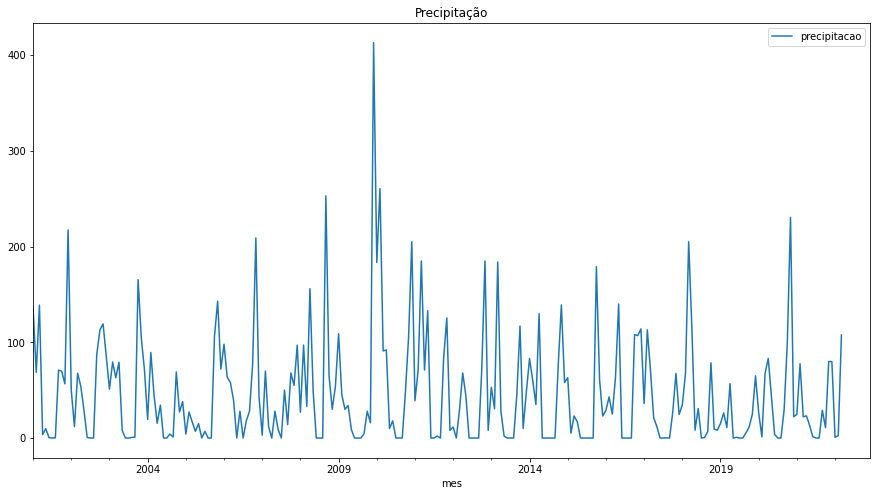

In [9]:
mydata.plot.line(figsize=(15,8), title='Precipitação')

In [10]:
# Count null values to remove
null_values = mydata.isnull().sum()
print(null_values)

precipitacao    9
dtype: int64


In [11]:
# Dropping last n rows using drop
mydata.drop(mydata.tail(null_values[0]).index, inplace = True)

In [12]:
mydata.isnull().sum()

precipitacao    0
dtype: int64

In [13]:
# Split data into training and testing samples
data_split = load_data.test_training_split(mydata, months_test_size=24)
train_data = data_split['train']
test_data = data_split['test']

In [14]:
train_data.tail()

,precipitacao
mes,
2019-11-01,24.8
2019-12-01,65.0
2020-01-01,26.4
2020-02-01,1.2
2020-03-01,67.4


In [15]:
train_data.shape

(231, 1)

In [16]:
test_data.tail()

,precipitacao
mes,
2021-11-01,80.0
2021-12-01,79.8
2022-01-01,0.8
2022-02-01,2.4
2022-03-01,107.6


In [17]:
test_data.shape

(24, 1)

## Linear Regression

In [18]:
x = np.arange(0, len(mydata))  # create vector
y = np.array(mydata)
X = sm.add_constant(x)

lr_model = sm.OLS(y, X)
lr = lr_model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.822
Date:                Thu, 21 Apr 2022   Prob (F-statistic):              0.178
Time:                        21:55:57   Log-Likelihood:                -1397.9
No. Observations:                 255   AIC:                             2800.
Df Residuals:                     253   BIC:                             2807.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.6331      7.291      7.493      0.0

#### https://datatofish.com/statsmodels-linear-regression/
- R-squared : the coefficient of determination. It is the proportion of the variance in the dependent variable that is predictable/explained
- Adj. R-squared : Adjusted R-squared is the modified form of R-squared adjusted for the number of independent variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve the model. - 
- F-statistic : the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.
- coef : the coefficients of the independent variables and the constant term in the equation.
- t : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesized value of a parameter, to the standard error

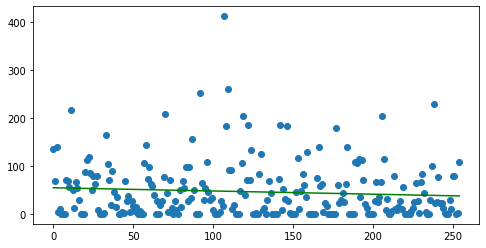

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y)

x_pred = np.linspace(x.min(), x.max(), x.shape[0])
x_pred2 = sm.add_constant(x_pred)

y_pred = lr.predict(x_pred2)

ax.plot(x_pred, y_pred, '-', color='green')

In [20]:
y_pred

array([54.63307904, 54.5660284 , 54.49897775, 54.43192711, 54.36487646,
       54.29782582, 54.23077517, 54.16372453, 54.09667388, 54.02962323,
       53.96257259, 53.89552194, 53.8284713 , 53.76142065, 53.69437001,
       53.62731936, 53.56026872, 53.49321807, 53.42616742, 53.35911678,
       53.29206613, 53.22501549, 53.15796484, 53.0909142 , 53.02386355,
       52.95681291, 52.88976226, 52.82271161, 52.75566097, 52.68861032,
       52.62155968, 52.55450903, 52.48745839, 52.42040774, 52.3533571 ,
       52.28630645, 52.2192558 , 52.15220516, 52.08515451, 52.01810387,
       51.95105322, 51.88400258, 51.81695193, 51.74990129, 51.68285064,
       51.61579999, 51.54874935, 51.4816987 , 51.41464806, 51.34759741,
       51.28054677, 51.21349612, 51.14644548, 51.07939483, 51.01234418,
       50.94529354, 50.87824289, 50.81119225, 50.7441416 , 50.67709096,
       50.61004031, 50.54298967, 50.47593902, 50.40888837, 50.34183773,
       50.27478708, 50.20773644, 50.14068579, 50.07363515, 50.00

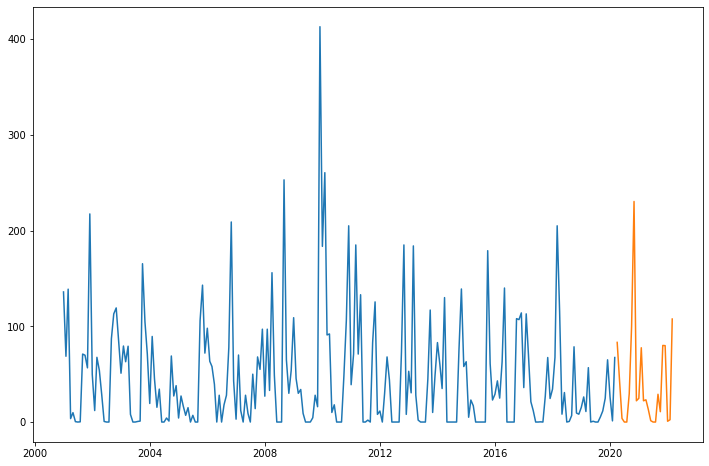

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
# plt.plot(y_pred, label='Test')
plt.show()

## Holt Winters

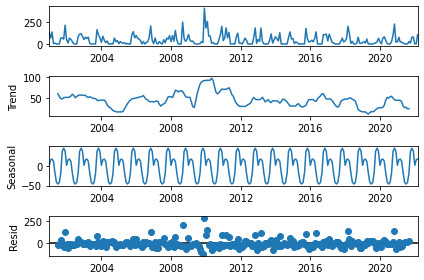

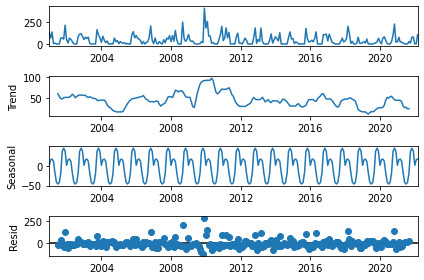

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decompose_result = seasonal_decompose(mydata, model='additive')
decompose_result.plot()

In [23]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.metrics import mean_absolute_error

c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

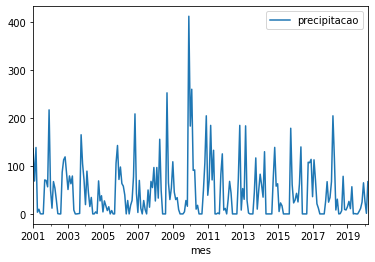

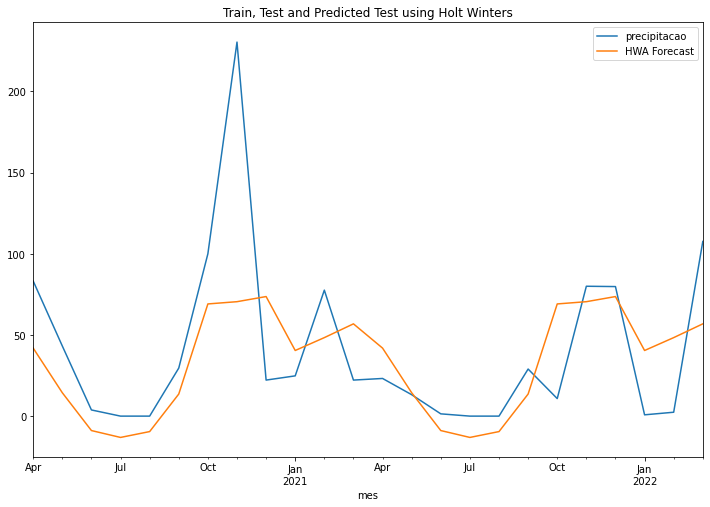

In [24]:
# Holt Winters Additive method
hwa_model = ExponentialSmoothing(train_data,
#                                  trend='add',
                                 seasonal= 'additive',
                                 seasonal_periods=12
                                ).fit()
hwa_test_pred = hwa_model.forecast(24).rename('HWA Forecast')

train_data.plot(legend=True,label='Train')
test_data.plot(legend=True,label='Test', figsize=(12,8))
hwa_test_pred.plot(legend=True,label='HWA Forecast')

plt.title('Train, Test and Predicted Test using Holt Winters')

In [25]:
# RMSE (HWA)
rmse_hwa = round(np.sqrt(mean_squared_error(test_data, hwa_test_pred)), 2)
print("RMSE_HWA is ", rmse_hwa)
mae_hwa = round(mean_absolute_error(test_data,hwa_test_pred),2)
print("MAE_HWA is ", mae_hwa)
mape_hwa = round(100*mean_absolute_percentage_error(test_data,hwa_test_pred), 2)
print("MAPE_HWA is ", mape_hwa,'%')

RMSE_HWA is  43.51
MAE_HWA is  30.07
MAPE_HWA is  8.499160170474333e+17 %


In [26]:
# df3 = pd.DataFrame([['Jane', rmse_hwa, mae_hwa, mape_hwa]], 
#     columns=['Model', 'RMSE', 'MAE', 'MAPE'])
# df = df.append(df3)

In [27]:
results = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])
def evaluate(results, testData, pred, modelName):
    # RMSE (HWA)
    rmse_hwa = round(np.sqrt(mean_squared_error(test_data, hwa_test_pred)), 2)
    print("RMSE_HWA is ", rmse_hwa)
    mae_hwa = round(mean_absolute_error(test_data,hwa_test_pred),2)
    print("MAE_HWA is ", mae_hwa)
    mape_hwa = round(100*mean_absolute_percentage_error(test_data,hwa_test_pred), 2)
    print("MAPE_HWA is ", mape_hwa,'%')
    df3 = pd.DataFrame([[modelName, rmse_hwa, mae_hwa, mape_hwa]], 
    columns=['Model', 'RMSE', 'MAE', 'MAPE'])
    results = df.append(df3)
    return results

In [28]:
evaluation = evaluate(results, test_data, hwa_test_pred, 'HoltWinters')

RMSE_HWA is  43.51
MAE_HWA is  30.07
MAPE_HWA is  8.499160170474333e+17 %


In [29]:
print(hwa_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             precipitacao   No. Observations:                  231
Model:             ExponentialSmoothing   SSE                         592770.491
Optimized:                         True   AIC                           1841.383
Trend:                             None   BIC                           1889.577
Seasonal:                      Additive   AICC                          1843.926
Seasonal Periods:                    12   Date:                 Thu, 21 Apr 2022
Box-Cox:                          False   Time:                         21:55:59
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0275530                alpha                 True
smoothing_seasonal       

##  AR, MA, ARMA, SARMA, ARIMA and SARIMA

In [30]:
# First step is to understand if dat is stationary
# for that de dickey-fuller test is going to be usd
from statsmodels.tsa.stattools import adfuller

def stationary_test(data):
    x=data.dropna() 
    result=adfuller(x)
    print("ADF Stataics ",result[0])
    print("p-value",result[1])
    print("critical values",result[5])
    if result[1]<=0.5:
        print("fail to reject null hypothese h1 , it mean data is stationary")
    else:
        print("Reject the null hypotheise , it mean data is not stationary")

In [31]:
stationary_test(train_data)

ADF Stataics  -2.749109670555995
p-value 0.06591879811432037
critical values 2334.114496482203
fail to reject null hypothese h1 , it mean data is stationary


Data is stationary! lets find the correlation!

* (ACF) Auto correlation function to find q value.
* (PACF) Partially Auto correlation function to find p value.

c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


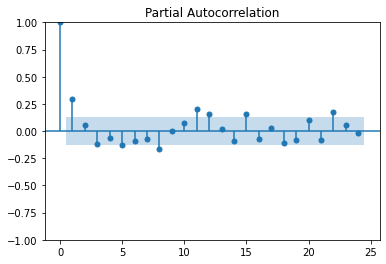

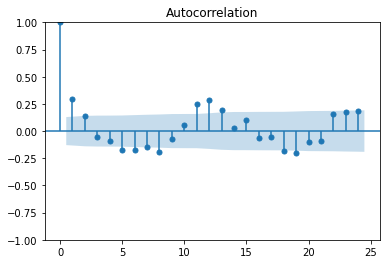

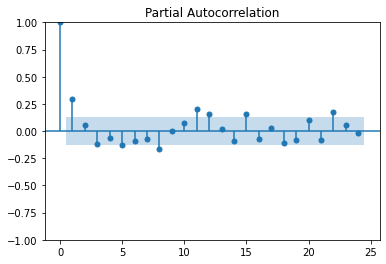

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train_data)
plot_pacf(train_data)

### AR

In [33]:
# For a first ARMA model approach we are going to select p=2 and q=2
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train_data, lags=50).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:           precipitacao   No. Observations:                  231
Model:                    AutoReg(50)   Log Likelihood                -959.602
Method:               Conditional MLE   S.D. of innovations             48.557
Date:                Thu, 21 Apr 2022   AIC                           2023.204
Time:                        21:55:59   BIC                           2189.526
Sample:                    03-01-2005   HQIC                          2090.634
                         - 03-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               26.0087     19.988      1.301      0.193     -13.166      65.184
precipitacao.L1      0.2239      0.074      3.016      0.003       0.078       0.369
precipitacao.L2      0.0550 

c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<AxesSubplot:xlabel='mes'>

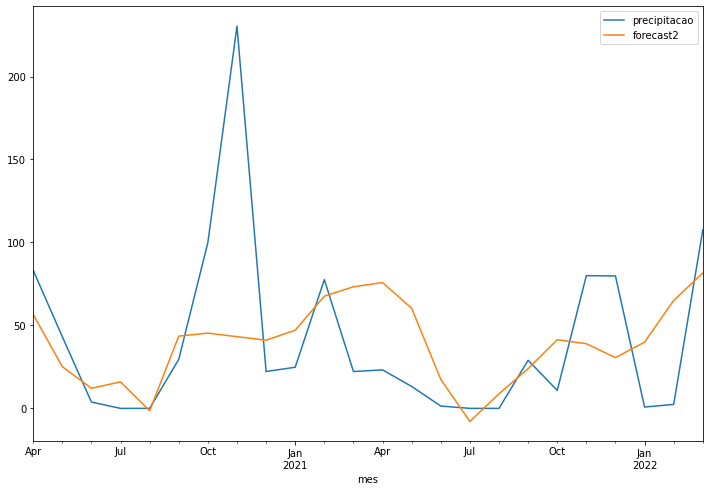

In [34]:
teste = mydata
teste['forecast2'] = ar_model.predict(start = mydata.shape[0]-24, end=mydata.shape[0], dynamic= True)  
teste[['precipitacao', 'forecast2']].iloc[-24:].plot(figsize=(12, 8))

In [35]:
rmse_ar = round(np.sqrt(mean_squared_error(test_data, teste['forecast2'][-24:])), 2)
print("RMSE_AR is ", rmse_ar)
mae_ar = round(mean_absolute_error(test_data, teste['forecast2'][-24:]),2)
print("MAE_AR is ", mae_ar)
mape_hwa = round(100*mean_absolute_percentage_error(test_data, teste['forecast2'][-24:]), 2)
print("MAPE_AR is ", mape_ar,'%')

RMSE_HWA is  49.89
MAE_HWA is  33.95
MAPE_HWA is  6.403289519533441e+17 %


### MA

c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='mes'>

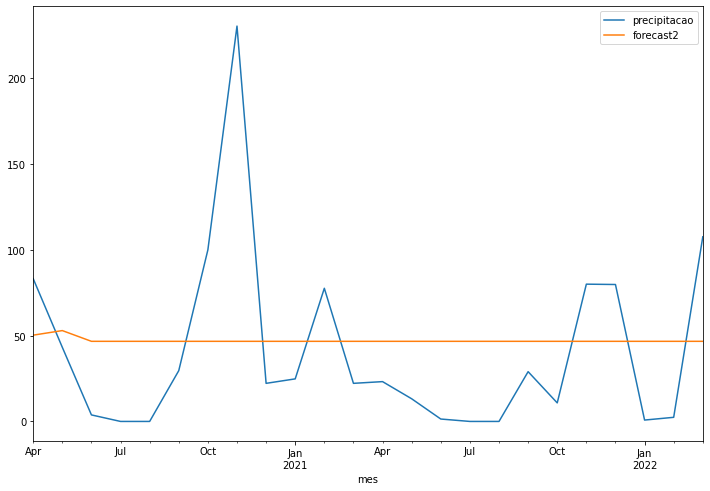

In [38]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
ma_model = ARIMA(train_data, order=(0, 0, 2)).fit()
# make prediction
teste2 = mydata
teste2['forecast2'] = ma_model.predict(start = mydata.shape[0]-24, end=mydata.shape[0], dynamic= True)  
teste2[['precipitacao', 'forecast2']].iloc[-24:].plot(figsize=(12, 8))

In [39]:
print(ma_model.summary())

                               SARIMAX Results                                
Dep. Variable:           precipitacao   No. Observations:                  231
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1257.301
Date:                Thu, 21 Apr 2022   AIC                           2522.603
Time:                        22:06:17   BIC                           2536.372
Sample:                    01-01-2001   HQIC                          2528.156
                         - 03-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.6886      7.912      5.901      0.000      31.182      62.195
ma.L1          0.2878      0.086      3.336      0.001       0.119       0.457
ma.L2          0.1681      0.053      3.184      0.0

In [40]:
rmse_ma = round(np.sqrt(mean_squared_error(test_data, teste2['forecast2'][-24:])), 2)
print("RMSE_MA is ", rmse_ma)
mae_ma = round(mean_absolute_error(test_data, teste2['forecast2'][-24:]),2)
print("MAE_MA is ", mae_ma)
mape_ma = round(100*mean_absolute_percentage_error(test_data, teste2['forecast2'][-24:]), 2)
print("MAPE_MA is ", mape_ma,'%')

RMSE_MA is  52.66
MAE_MA is  41.73
MAPE_MA is  3.504445188235051e+18 %


### ARMA

c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive par

<AxesSubplot:xlabel='mes'>

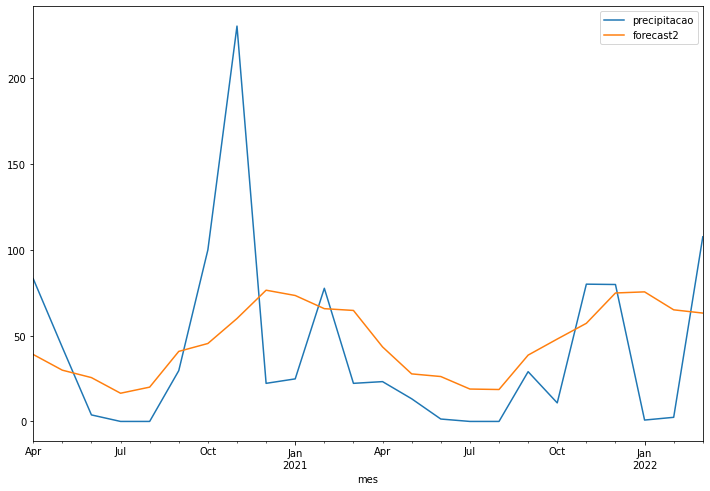

In [48]:
# fit model
arma_model = ARIMA(train_data, order=(5, 0, 5)).fit()
# make prediction
teste3 = mydata
teste3['forecast2'] = arma_model.predict(start = mydata.shape[0]-24, end=mydata.shape[0], dynamic= True)  
teste3[['precipitacao', 'forecast2']].iloc[-24:].plot(figsize=(12, 8))

In [49]:
rmse_arma = round(np.sqrt(mean_squared_error(test_data, teste3['forecast2'][-24:])), 2)
print("RMSE_ARMA is ", rmse_arma)
mae_arma = round(mean_absolute_error(test_data, teste3['forecast2'][-24:]),2)
print("MAE_ARMA is ", mae_arma)
mape_arma = round(100*mean_absolute_percentage_error(test_data, teste3['forecast2'][-24:]), 2)
print("MAPE_ARMA is ", mape_arma,'%')

RMSE_ARMA is  49.21
MAE_ARMA is  35.94
MAPE_ARMA is  1.3867488709792233e+18 %
